In [1]:
import numpy as np
import cv2 as cv

from process_video import skip_frames, write_frames, read_frames
from lane_occupancy import calc_occupancy, detect_occupancy, plot_test_occupancy
from traffic_count import train_bg_substractor, run_traffic_count, plot_test_count

%matplotlib inline

In [2]:
# Parameters
vid_in = './AB17-0830H.avi'
vid_out = './AB17-0830H_output.mp4'

vcap = cv.VideoCapture(vid_in)
fps = vcap.get(cv.CAP_PROP_FPS)
img_w = int(vcap.get(3))
img_h = int(vcap.get(4))

lane_areas = np.array([
    [0, 456], [477, 151], [549, 151], [529, 719], [0, 719], [0, 456],
    [937, 720], [585, 161], [638, 161], [1279, 540], [1279, 719], [937, 720]
])

In [ ]:
skip_frames(vcap, 100)
out_frames, frame_occupancies = detect_occupancy(vcap, lane_areas, end=100, output_video=True)
vcap.release()
write_frames(out_frames, vid_out, fps, img_w, img_h)

In [ ]:
vcap = cv.VideoCapture(vid_in)
skip_frames(vcap, 100)
ret, frame = vcap.read()
if ret:
    plot_test_occupancy(frame, lane_areas)

500

In [3]:
vcap = cv.VideoCapture(vid_in)
frames = read_frames(vcap, end=500)
bg_subtractor = train_bg_substractor(frames)
out_frames, frame_matches = run_traffic_count(vcap, bg_subtractor, end=100, output_video=True)
vcap.release()
write_frames(out_frames, vid_out, fps, img_w, img_h)

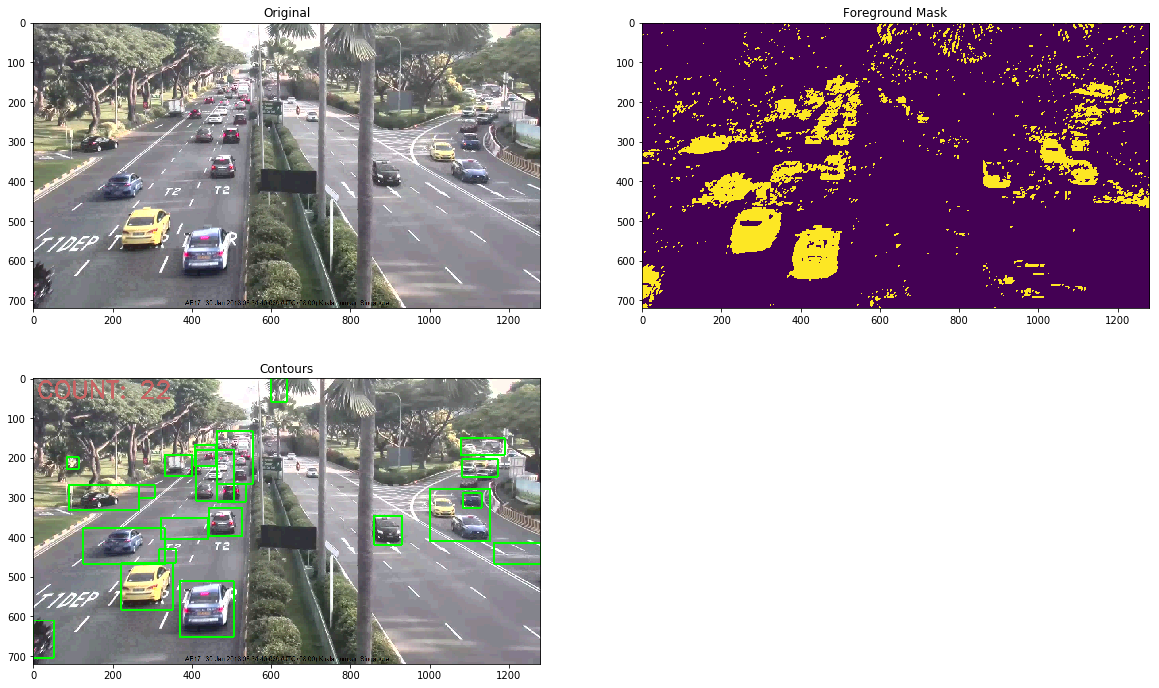

In [3]:
vcap = cv.VideoCapture(vid_in)
frames = read_frames(vcap, end=500)
bg_subtractor = train_bg_substractor(frames)
ret, frame = vcap.read()
if ret:
    plot_test_count(frame, bg_subtractor)